# 第一节课 使用Keras写一个mlp

mlp就是multilayer perceptron，多层感知机。数据集用的是经典的mnist，数字分类问题。

首先导入keras的各种模块

keras.datasets 里面包含了多种常用数据集，如mnist，cifar10等等，可以实现自动下载和解析等等。

keras.models 里面有最核心的模型结构，如顺序模型结构Sequential

keras.layers 里面有一些常用的层结构，如全连接层Dense

keras.optimizers 里面有一些常用优化函数，如adam等

In [1]:
import keras
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop

Using TensorFlow backend.


载入mnist数据，第一次会自动下载，之后运行会载入本地文件。

注：这个方法非常慢，还是使用TF的数据集转换过来更为方便

In [2]:

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
 
x_train, y_train = mnist.train.images, mnist.train.labels
x_test, y_test = mnist.test.images, mnist.test.labels

W0725 09:26:31.788184  2860 deprecation.py:323] From <ipython-input-2-667e74665c93>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0725 09:26:31.789185  2860 deprecation.py:323] From D:\Program Files (x86)\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0725 09:26:31.790181  2860 deprecation.py:323] From D:\Program Files (x86)\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for 

Extracting MNIST_data/train-images-idx3-ubyte.gz


W0725 09:26:32.099389  2860 deprecation.py:323] From D:\Program Files (x86)\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0725 09:26:32.106336  2860 deprecation.py:323] From D:\Program Files (x86)\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0725 09:26:32.177179  2860 deprecation.py:323] From D:\Program Files (x86)\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be 

Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


↓查看一下数据格式，训练集一共有55000张，每一幅图像都转换为一个长向量，大小为28*28=784，代表大小是28*28,单通道灰度图，测试集是1000张。标签是列向量

In [3]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(55000, 784) (55000, 10)
(10000, 784) (10000, 10)


如果需要进行卷积运算，则转为

    x_train = x_train.reshape(-1, 28, 28,1).astype('float32')
    x_test = x_test.reshape(-1,28, 28,1).astype('float32')

↓可视化一些图片

In [14]:
import numpy as np
img1 = np.reshape(x_train[0],(28,28)) # 28x28 图片
img2 = np.reshape(x_train[1],(28,28))
print(img1.shape)
img1

(28, 28)


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

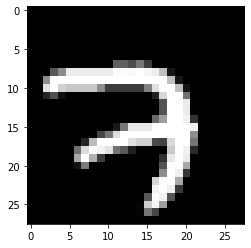

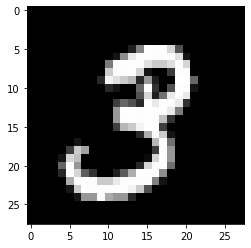

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
im = plt.imshow(img1,cmap='gray')
plt.show()
im2 = plt.imshow(img2,cmap='gray')
plt.show()

归一化，将图像的像素归到0~1

这样做的一个原因是  数字图像取值范围是0~255

In [7]:
x_train = x_train/255
x_test = x_test/255

将label也转换成One-hot标签，如果标签不是onehot编码，则需要转换

这里直接用keras的预置的一个函数 keras.utils.to_categorical

In [19]:
print(y_train[0:10])# 查看原始标签 0~9

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


开始构建模型，模型分包含两个隐层和一个输出层,都是全连接层，使用Sequential构建

其中隐层输出采用ReLU激活函数，Sequential的第一层要指定input_shape，要注意，这里的input_shape 是不包含batch大小的，就只是后面几维

In [ ]:
??Dense

In [20]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [21]:
model.summary()#这一句用来输出网络结构

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.get_config()

[{'class_name': 'Dense',
  'config': {'activation': 'relu',
   'activity_regularizer': None,
   'batch_input_shape': (None, 784),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'dtype': 'float32',
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_regularizer': None,
   'name': 'dense_1',
   'trainable': True,
   'units': 512,
   'use_bias': True}},
 {'class_name': 'Dropout',
  'config': {'name': 'dropout_1',
   'noise_shape': None,
   'rate': 0.2,
   'seed': None,
   'trainable': True}},
 {'class_name': 'Dense',
  'config': {'activation': 'relu',
   'activity_regularizer': None,
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'kernel_constraint': None,
   'kernel_initializer': {'class_n

配置模型，主要包括

- loss：loss计算方法（损失函数）

- optimizer：优化函数

- metrics：指定哪些量需要在训练及测试中关注，一般都会写accuracy

In [22]:
model.compile(loss='categorical_crossentropy',  # 交叉熵
             optimizer=RMSprop(),
             metrics=['accuracy'])

开始训练。这里使用的是model对象的fit方法。

前两个参数分别是**完整的训练数据和训练标签**

batch_size 表示每一次塞入多少张图片

epochs 表示训练几轮

verbose 表示用何种方式显示输出信息，0表示不输出，1表示在一直输出更新，2表示每一个epoch才输出一次。

validation_data 表示验证集，格式和训练集一样，如果此参数不为空的话，每一个epoch过后就会输出验证集的loss和accuracy

In [23]:
model.fit(x_train,y_train,batch_size=64,epochs=2,verbose=1,
         validation_data=(x_test,y_test))

Train on 55000 samples, validate on 10000 samples
Epoch 1/2
55000/55000 [==============================] - 14s 256us/step - loss: 0.7288 - acc: 0.7763 - val_loss: 0.4500 - val_acc: 0.8551
Epoch 2/2
55000/55000 [==============================] - 14s 254us/step - loss: 0.3303 - acc: 0.9014 - val_loss: 0.2673 - val_acc: 0.9180


测试结果，输出为loss以及其他之前compile模型时指定过的metrics的值

In [24]:
score = model.evaluate(x_test,y_test,verbose=1)
print('Test loss:',score[0])
print('Test accuracy',score[1])

10000/10000 [==============================] - 1s 85us/step
Test loss: 0.2672776402115822
Test accuracy 0.918


In [26]:
score

[0.2672776402115822, 0.918]

## 总结

本文主要写了一个最简单的多层感知机模型，目的是熟悉keras最基本的操作。

知识点：

1. 学习载入Keras中预置的数据库及数据库数据的基本变换
1. Sequential模型的定义，以及如何添加层
1. 如何对Dense层及Dropout层进行基本的配置
1. 学习使用compile对网络进行配置
1. 使用fit方法来对小数据库进行训练，这里的小数据库指的是所有数据可以一次性载入到内存
1. 使用evaluate方法来对模型进行效果评估

参考：
> https://github.com/keras-team/keras/tree/master/examples